In [14]:
import numpy as np
import pandas as pd
import sklearn
import pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import torch
import matplotlib
%matplotlib inline

In [2]:
data = np.load('result/features/res.npy', allow_pickle=True)
data.shape

(281, 2)

In [3]:
X, y = data[:, 0], data[:, 1]

In [4]:
z = np.array([*X])
z.shape

(281, 64)

In [5]:
y_color = pd.DataFrame({'label':np.array(y, dtype=np.int)})
y_color

,label
0,1
1,0
2,0
3,0
4,0
...,...
276,0
277,1
278,0
279,1


In [6]:
color_table = ['#FF0000', '#0000FF']
type_table = ['a', 'h']
y_color['color'] = y_color['label'].apply(lambda x: color_table[x])
y_color['type'] = y_color['label'].apply(lambda x: type_table[x])
y_color

,label,color,type
0,1,#0000FF,h
1,0,#FF0000,a
2,0,#FF0000,a
3,0,#FF0000,a
4,0,#FF0000,a
...,...,...,...
276,0,#FF0000,a
277,1,#0000FF,h
278,0,#FF0000,a
279,1,#0000FF,h


In [7]:
tsne_z = TSNE(n_components=2).fit_transform(z)
tsne_z.shape

(281, 2)

Text(0, 0.5, 'The second score')

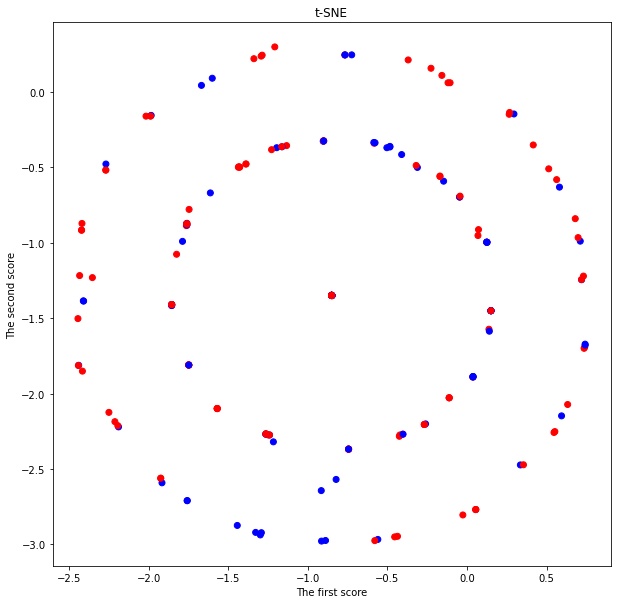

In [8]:
plt.figure(figsize=(10, 10))
plt.scatter(tsne_z[:, 0], tsne_z[:, 1], color=y_color['color'])
plt.title('t-SNE')
plt.xlabel('The first score')
plt.ylabel('The second score')

In [9]:
kmeans = KMeans(n_clusters=2).fit(z)
pred = kmeans.labels_
pred

<ipython-input-9-253b26bbafcc>:1: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=2).fit(z)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [10]:
#Acc 58.4 -> 59.4
count = [{'a': 0, 'h': 0} for _ in range(2)]
for i, pred_label in enumerate(pred):
    count[pred_label][y_color['type'][i]] += 1
count


[{'a': 167, 'h': 114}, {'a': 0, 'h': 0}]